# Max-cut problem$ 
% Text formating
\newcommand {\th}{^{th}} % for ith, jth, etc. 
% General Latex Definitions
\newcommand {\vec}{\mathbf} % Vector variable
\newcommand {\mat}{} % Matrix variable
\newcommand {\set}{\mathcal} % Set name
\newcommand{\invs}{^{-1}}
\newcommand{\trans}{^ \top} % Vector or matrix transpose notation (\intercal is an alternative)
\newcommand{\suchthat}{\mid} %Alternative: \mathrel{} \middle| \mathrel{} 
\newcommand {\definedas}{:=}
\newcommand {\arctan}{\text{tan}^{-1}}
\newcommand {\abs}[1]{|#1|}
\newcommand {\innerproduct}[2]{\langle #1, #2 \rangle}
\newcommand {\for}{\text{for}\;}
\newcommand {\and}{\quad \text{and}\quad}
\newcommand {\norm}[1]{\left\lVert#1\right\rVert}
\newcommand {\onenorm}[1]{\norm{#1}_{1}}
\newcommand {\twonorm}[1]{\norm{#1}_{2}}
\newcommand {\pnorm}[1]{\norm{#1}_{p}}
\newcommand {\inftynorm}[1]{\norm{#1}_{\infty}}
% Sets
\newcommand {\reals}{\mathbb{R}}
\newcommand {\realsn}{\reals^{n}}
\newcommand {\positivereals}{\reals_{>0}}
\newcommand {\integers}{\mathbb{Z}}
\newcommand \squarematrices[1][n]{\reals^{#1 \times #1}}
\newcommand \symmetricmatrices[1][n]{\mathbb{S}^{#1}}
\newcommand \pdmatrices[1][n]{\symmetricmatrices[#1]_{++}}
\newcommand \psdmatrices[1][n]{\symmetricmatrices[#1]_{+}}
% Common vectors. If a value is a variable don't use the "\"
\newcommand {\x}{\vec x}
\newcommand {\y}{\vec y} 
\newcommand {\u}{\vec u}
\newcommand {\v}{\vec v}
\newcommand {\onevec}{\mathbb{1}}
% Common Matrices
\newcommand {\A}{\mat A} 
\newcommand {\B}{\mat B}
\newcommand {\X}{\mat X} 
\newcommand {\Y}{\mat Y}
\newcommand {\I}{\mat I} % Identity
% Matrix shortcut
\newcommand {\beginmatrix}{\begin{bmatrix}}
\newcommand {\endmatrix}{\end{bmatrix}}
\newcommand {\beginalign}{\begin{align}}
\newcommand {\endalign}{\end{align}}
% Calculus
\newcommand {\derive}[2]{\frac{d#1}{d#2}}
\newcommand {\ddx}{\derive{}{x}}
\newcommand {\ddt}{\derive{}{t}}
\newcommand {\dxdt}{\derive{x}{t}}
\newcommand {\dydt}{\derive{y}{t}}
\newcommand {\dfdx}{\derive{f}{x}}
\newcommand {\del}{\nabla}
\newcommand {\hessian}{\del^2}
% Convex Optimizations
\newcommand \convexcombo[2]{\theta #1 + (1 - \theta)#2}
\newcommand \minimize[1]{\underset{#1}{\text{minimize}}\quad} % Usage: \minimize{\x \in \reals}
\newcommand {\subjectto}{\text{subject to}\quad}
% Exponent Taylor Series Definition
\newcommand \exponentsum[1]{\sum^\infty_{k=1} \frac{#1^k}{k!}}
% Matrix shortcuts
\newcommand \diagmatrix[2]{
\begin{bmatrix} 
#1 & & \\
& \ddots & \\
& & #2 \\
\end{bmatrix}}
% Brackets and parentheses.
\newcommand {\(}{\left(}
\newcommand {\)}{\right)}
\newcommand {\}}{\right\}}
\newcommand {\{}{\left\{}
$

An undirected graph $\mathscr{G} = (\mathcal{V},\mathcal{E})$ is defined as a collection of two sets: a set of vertices $\mathcal{V}$, and a set of edges $\mathcal{E}$. If there is an edge $e_{ij}\in\mathcal{E}$ connecting the vertices $v_{i},v_{j}\in\mathcal{V}$, then we can assign an weight $w_{ij} \geq 0$ to that edge to model the relative importance of that particular edge. Assuming the cardinality of the vertex set $|\mathcal{V}|=n$ , we normalize the weights as $\sum_{i,j=1}^{n}w_{ij} = 1$. This gives rise to a weighted directed graph $\mathscr{G}_{W} = (\mathcal{V},\mathcal{E},W)$ where the edge weight matrix $W\in\mathbb{R}^{n\times n}$ is symmetric with elements in $[0,1]$.

A "cut" in $\mathscr{G}_{W}$ is simply a partition of the vertex set $\mathcal{V}$ into two (disjoint) sets: $\mathcal{S}$ and its complement $\overline{\mathcal{S}}:=\mathcal{V}\setminus\mathcal{S}$, that is, $\mathcal{V}=\mathcal{S}\cup\overline{\mathcal{S}}$. The "weight of a cut" is the sum of weights for those (and only those) edges which connect vertices in $\mathcal{S}$ to vertices in $\overline{\mathcal{S}}$. The "max-cut problem" concerns with finding a cut in $\mathscr{G}_{W}$ that maximizes the weight of cut. 

In the following example graph with $n=4$ vertices, the "red solid" cut is the max-cut (cut weight = 0.7), while the "blue dashed" cut is sub-optimal (cut-weight = 0.5). In this example, the red max-cut corresponds to the partition $\mathcal{V} = \{v_{1},v_{3}\} \cup \{v_{2},v_{4}\}$. The sub-optimal blue cut corresponds to the partition $\mathcal{V} = \{v_{1},v_{2}\} \cup \{v_{3},v_{4}\}$.

<img width="450" src="maxcut.png">

## (a) (5+5=10 points) 

To formulate the max-cut problem as an optimization problem, let us consider any cut $\mathcal{V}=\mathcal{S}\cup\overline{\mathcal{S}}$, and for $i=1,...,n$, assign a variable $x_{i}$ to each vertex of $\mathscr{G}_{W} = (\mathcal{V},\mathcal{E},W)$, as

$$x_{i} = \begin{cases} 
1 & \text{if}\quad v_{i}\in\mathcal{S},\\
-1 & \text{if}\quad v_{i}\in\overline{\mathcal{S}}.
\end{cases}$$

Next, notice that 

$$(1-x_{i}x_{j}) = \begin{cases} 
0 & \text{if the vertices $v_{i}$ and $v_{j}$ are in the same set}\\
2 & \text{otherwise}
\end{cases}$$

Therefore, the quantity $\sum_{i<j}w_{ij}(1-x_{i}x_{j})$ is twice the cut weight, and hence the max-cut problem is

$$\begin{aligned}
p^{*} := \underset{x\in\{-1,+1\}^{n}}{\text{maximize}}\quad\displaystyle\frac{1}{2}\displaystyle\sum_{i<j}w_{ij}\left(1-x_{i}x_{j}\right).
\end{aligned}$$

### Explain why the above max-cut problem is equivalent to solving

$$\underset{x\in\{-1,+1\}^{n}}{\text{minimize}}\quad x^{\top}W x.$$

#### Solution

Positive scaling preserves convexity.
$\sum_{i,j=1}^n w_{ij} = 1$, so it is constant, therefore the problem reduces to 

$$\sum -w_{ij} x_i x_j = -\sum x_i w_{ij} x_j = $$. 

If $i = 1, \dots, n$ and $j = 1, \dots, n$, then the sum would reduce to $\x\trans W \x$, but the indices are actually $i = 1, \dots, j-1$.

Note, however, that 
$$\beginalign 
\x\trans W \x 
&= \sum_{i,j=1}^nx_i w_{ij} x_j \\
&= \sum_{i \lt j}x_i w_{ij} x_j + \sum_{i=j} x_i w_{ij} x_j + \sum_{i \gt j}x_i w_{ij} x_j \\
&= 2\sum_{i \lt j}x_i w_{ij} x_j + \sum_{i=j} x_i w_{ij} x_j \\
&= 2\sum_{i \lt j}x_i w_{ij} x_j
\endalign $$. 

The solution of the problem does not change depending on the values of $w_{ii}$, because it represents the weight of the edge of a node to itself. Mathematically, 

$$ \sum_{i=j} x_i w_{ij} x_j = \sum_{i} x_i w_{ii} x_i = 0$$

TODO Cleanup argument...

### Is this optimization problem convex? Why/why not? 

(Hint: $\frac{1}{2}\sum_{i<j}w_{ij}(1-x_{i}x_{j}) = \frac{1}{4}\sum_{i,j}w_{ij}(1-x_{i}x_{j})$.)

#### Solution

No, because the domain $\{-1, +1\}^n$ is not convex.

## (b) (15 points) 

Although the constraint set of the optimization problem derived in part (a) is finite, it has cardinality $2^{n}$, and therefore, it is computationally impractical to take enumerative approach to solve it for large $n$. In fact, this optimization problem is known to be NP hard.

Derive the Lagrangian, the Lagrange dual function, and the dual optimization problem for the primal problem obtained in part (a).

### Solution

We can restate the equality constraint as $h_i(\x)= \abs{x_i} - 1= 0$

Lagrangian: 

$$ \beginalign 
L(\x, \vec \lambda, \vec \nu) 
&= f_o(\x) + \innerproduct{\vec \nu}{\vec h(\x)} \\
&= \x \trans W \x + \sum_{i=1}^n \nu_i (\abs{x_i} - 1) \\
&= \x \trans W \x + \sum_{i=1}^n \nu_i \abs{x_i} - \nu_i 
\endalign $$

The Lagrange dual function

$$\beginalign g(\vec \nu) 
&\definedas \inf_{\x} L(\x, \vec \nu) \\
&= \inf_{\x} \left(\x \trans W \x + \sum v_i(\abs{x_i}-1)\right)\endalign$$

...

$$
\{ \( \( \sum \) \)\}
$$

## (c) (10 points) 

Use the Lagrange dual function derived in part (b) to provide a **simple sub-optimal** (meaning, not the tightest) bound for $p^{*}$ in part (a).

### Solution

## (d) (10 points)

Is the dual problem derived in part (b) a convex optimization problem? If "yes", then what kind of convex optimization problem is it? If "no", then explain why not. 

### Solution

Yes, dual problems are always convex. 

It is a ... problem.

## (e) (15+5=20 points)

For the example graph with 4 vertices given above, write a code using cvxpy, to solve the dual problem. You need to write the code in your solution notebook. Use the answer of your cvxpy code to write an inequality for $p^{*}$ in part (a).

(Hint: Weak duality.)

### Solution

In [1]:
from cvxpy import *
x = Variable(n)
cost = 

## (f) (5+5+10=20 points)

Let us now go back to the problem derived in part (a):

$$\underset{x\in\{-1,+1\}^{n}}{\text{minimize}}\quad x^{\top}W x.$$

**Prove that the above optimization problem can be re-written as**

$$\begin{aligned}
&\underset{X\in\mathbb{S}^{n}_{+}}{\text{minimize}}\quad \text{trace}\left(WX\right)\\
&\text{subject to}\quad X_{ii} = 1,\quad i=1,...,n,\\
& \qquad\qquad\; \text{rank}(X) = 1.
\end{aligned}$$

#### Solution

**Is the above re-written optimization problem convex? Why/why not?**

#### Solution

Consider yet another modification of the above problem, obtained by ignoring/deleting the rank constraint:

$$\begin{aligned}
q^{*} =\, &\underset{X\in\mathbb{S}^{n}_{+}}{\text{minimize}}\quad \text{trace}\left(WX\right)\\
&\text{subject to}\quad X_{ii} = 1,\quad i=1,...,n.
\end{aligned}$$

**Is the above optimization problem convex? Why/why not?**

#### Solution

**Write an inequality between $p^{*}$ in part (a) and $q^{*}$ given above.**

#### Solution

## (g) (5+5=10 points) 

Let us examine the geometric meaning of the constraint set for $q^{*}$ in part (f). This set is called **elliptope**. For $n=3$, the elliptope

$$\{X \in \mathbb{S}^{3}_{+} \:\mid\: X_{11} = X_{22} = X_{33} = 1\} = \left\{(x,y,z)\in\mathbb{R}^{3} \mathrel{} \middle| \mathrel{}  \begin{bmatrix} 1 & x & y\\
x & 1 & z\\
y & z & 1\end{bmatrix} \succeq 0
\right\}$$
can be visualized as a subset of $\mathbb{R}^{3}$. Write a code to make a 3D plot the above set superimposed with the cube $[-1,1]^{3}$.

Is the above 3D set convex? Is it contained in $[-1,1]^{3}$? Mathematically justify your answers.

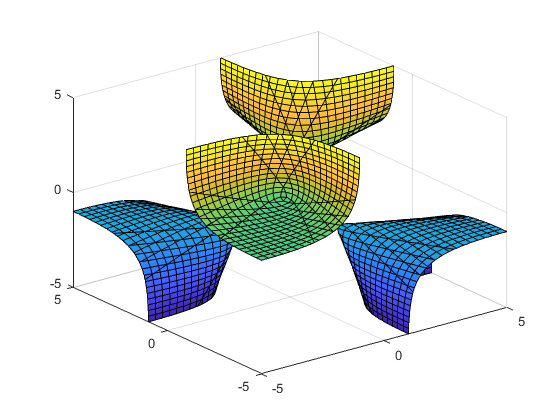

In [2]:
fimplicit3( @(x, y, z) 1 - x.^2 - y.^2 - z.^2 + 2.*x.*y.*z)

### Solution

## (h) (5 points) 

Write and explain the relation between $p^{*}$ (optimal value of the primal problem), $d^{*}$ (optimal value of the dual problem), and $q^{*}$ (optimal value of the problem derived in part (f)).

(Hint: Consider the dual problem of the dual problem derived in part (b).)

### Solution